In [73]:
import pandas as pd
import numpy as np
import vespa
from matplotlib import pyplot as plt
from astropy import units as u
from scipy.stats import gaussian_kde
from astropy.coordinates import SkyCoord

%matplotlib notebook

In [105]:
filename = 'grid/test.trilegal.h5'

dist = np.array([])
logL = np.array([])
Av = np.array([])
RA = np.array([])
Dec = np.array([])
lGal = np.array([])
bGal = np.array([])
RAgrid = [0]#np.arange(0,360, 1)
Decgrid = np.arange(-90, 45, 1)
for r in RAgrid:
    for d in Decgrid:
        print(r,d)
        filename = 'grid/trilegal.grid.ra'+str(r)+'.dec'+str(d)+'.h5'

        df = pd.read_hdf(filename)
        dist = np.append(dist, np.log10( 10.**(df['m-M0'].values/5.) *10. / 1000.)) #log(d [kpc])
        logL = np.append(logL, df['logL'].values)
        Av = np.append(Av, df['Av'].values)

        ras = np.random.uniform(low=r, high=(r+1.0), size=len(df['Av'].values))
        decs = np.random.uniform(low=d, high=(d+1.0), size=len(df['Av'].values))
        coords = SkyCoord(ras, decs, unit=(u.hr, u.degree),frame='icrs')
        RA = np.append(RA, ras)
        Dec = np.append(Dec, decs)
        lGal = np.append(lGal, coords.galactic.l.wrap_at(180.*u.degree).degree)
        bGal = np.append(bGal, coords.galactic.b.wrap_at(180.*u.degree).degree)


0 -90
0 -89
0 -88
0 -87
0 -86
0 -85
0 -84
0 -83
0 -82
0 -81
0 -80
0 -79
0 -78
0 -77
0 -76
0 -75
0 -74
0 -73
0 -72
0 -71
0 -70
0 -69
0 -68
0 -67
0 -66
0 -65
0 -64
0 -63
0 -62
0 -61
0 -60
0 -59
0 -58
0 -57
0 -56
0 -55
0 -54
0 -53
0 -52
0 -51
0 -50
0 -49
0 -48
0 -47
0 -46
0 -45
0 -44
0 -43
0 -42
0 -41
0 -40
0 -39
0 -38
0 -37
0 -36
0 -35
0 -34
0 -33
0 -32
0 -31
0 -30
0 -29
0 -28
0 -27
0 -26
0 -25
0 -24
0 -23
0 -22
0 -21
0 -20
0 -19
0 -18
0 -17
0 -16
0 -15
0 -14
0 -13
0 -12
0 -11
0 -10
0 -9
0 -8
0 -7
0 -6
0 -5
0 -4
0 -3
0 -2
0 -1
0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44


563453


<IPython.core.display.Javascript object>


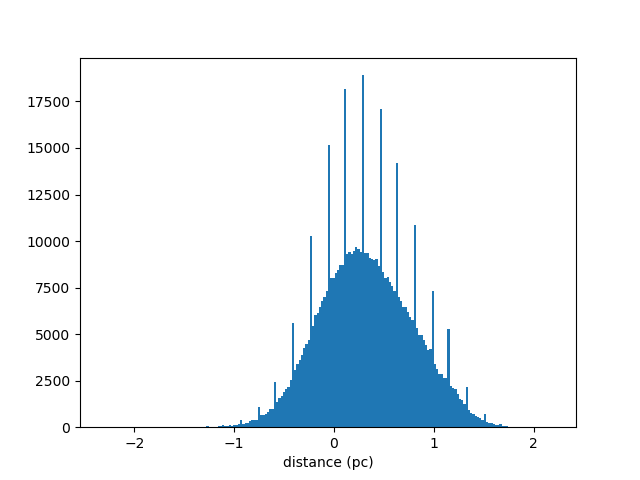

<IPython.core.display.Javascript object>


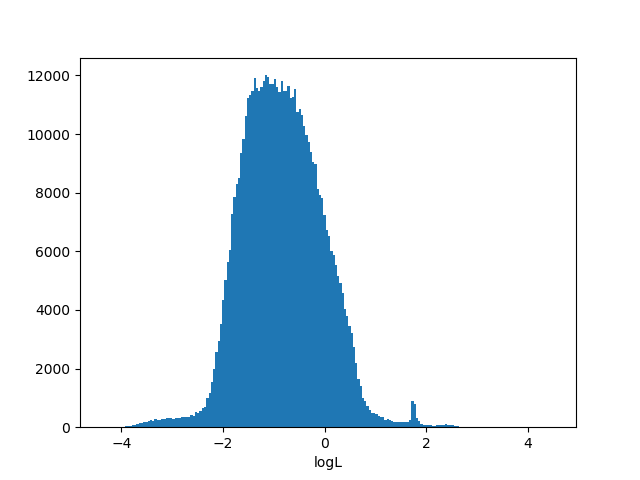

<IPython.core.display.Javascript object>


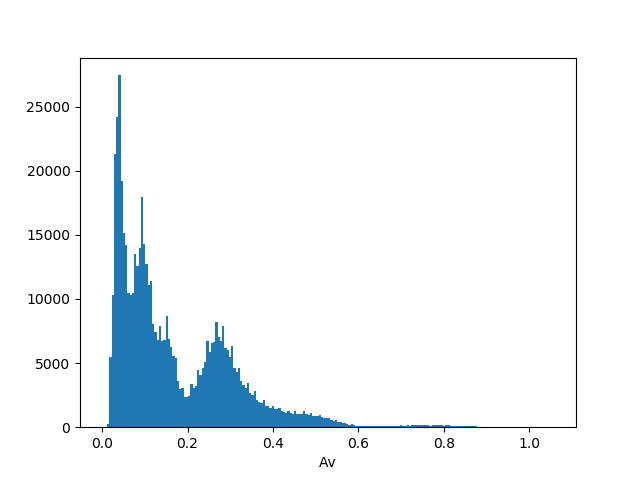

<IPython.core.display.Javascript object>


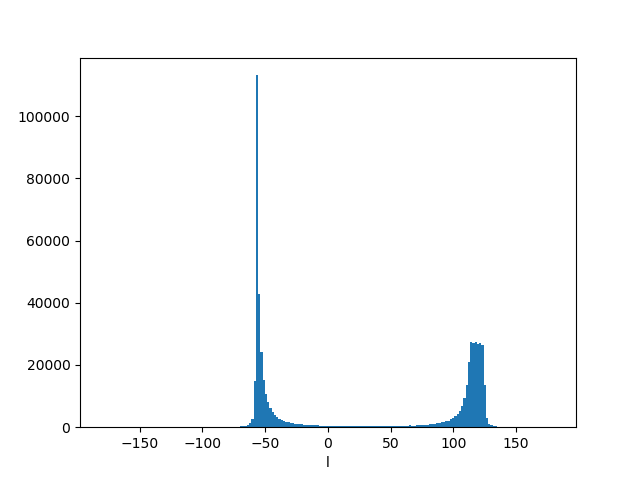

<IPython.core.display.Javascript object>


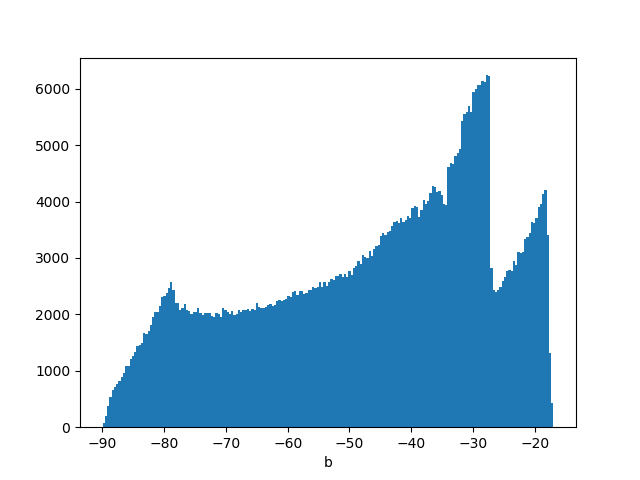

<IPython.core.display.Javascript object>


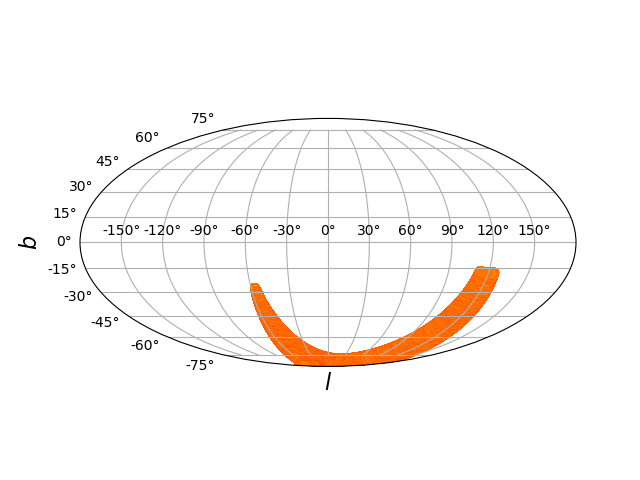

/Users/ageller/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/projections/geo.py:485: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


In [108]:
print(len(dist))
#nbins = int(np.floor(len(dist)**0.5))
nbins = 200

f,ax = plt.subplots()
n, bins, patches = ax.hist(dist, bins=nbins)
ax.set_xlabel('distance (pc)')

f,ax = plt.subplots()
n, bins, patches = ax.hist(logL, bins=nbins)
ax.set_xlabel('logL')

f,ax = plt.subplots()
n, bins, patches = ax.hist(Av, bins=nbins)
ax.set_xlabel('Av')

f,ax = plt.subplots()
n, bins, patches = ax.hist(lGal, bins=nbins)
ax.set_xlabel('l')

f,ax = plt.subplots()
n, bins, patches = ax.hist(bGal, bins=nbins)
ax.set_xlabel('b')

f, ax = plt.subplots(subplot_kw={'projection': "mollweide"})
ax.grid(True)
ax.set_xlabel(r"$l$",fontsize=16)
ax.set_ylabel(r"$b$",fontsize=16)
ax.scatter(lGal*np.pi/180.,bGal*np.pi/180.,c=logL,cmap='autumn',alpha = 0.3)


[-4. -3. -2. -1.  0.  1.  2.]


<IPython.core.display.Javascript object>


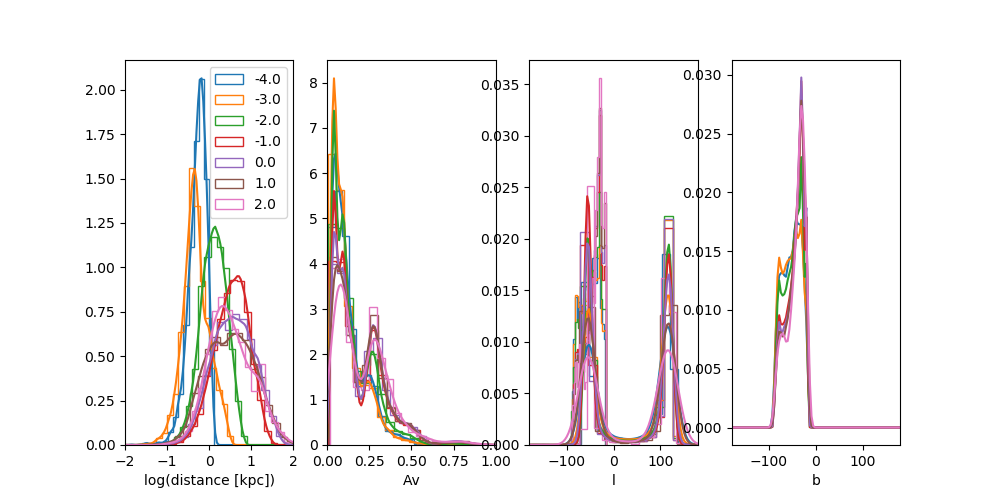

-4.0 3913
-3.0 23022
-2.0 220828
-1.0 232490
0.0 75010
1.0 6343
2.0 1133


<IPython.core.display.Javascript object>


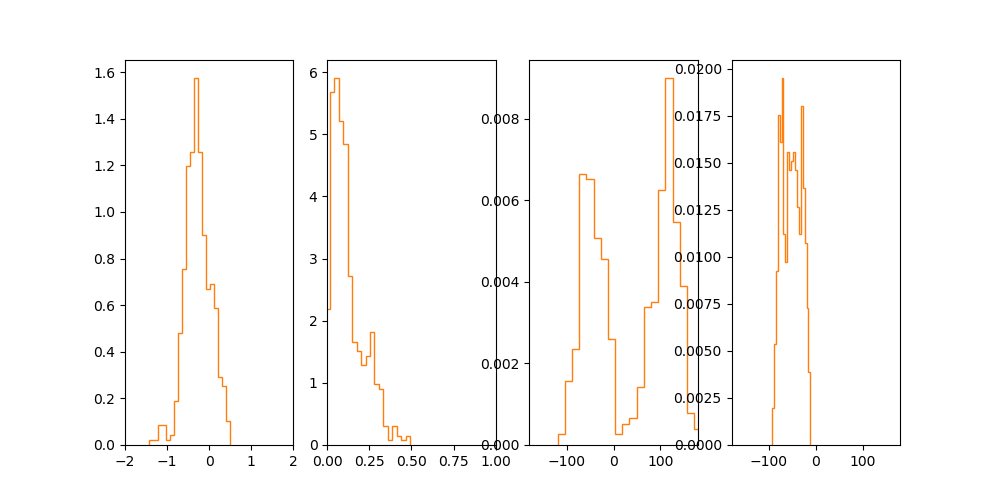

(-180, 180)

In [109]:
#take bins in logL
LbSize = 1.
Lbins = np.arange(-4,3,LbSize)
print(Lbins)

nbins = 20
kernels = {}

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
f,ax = plt.subplots(1,4, figsize=[10,5])
for i,L in enumerate(Lbins):
    inL = np.where(np.logical_and(logL > L, logL < L + LbSize))
    print(L, len(inL[0]))
    
    data = np.vstack((dist[inL], Av[inL], lGal[inL], bGal[inL]))
    KDE = gaussian_kde(data)
    kernels[L] = KDE
    _,_,_ = ax[0].hist(dist[inL], bins=nbins, density=True, histtype='step', color=colors[i], label=str(L))
    KDEd = gaussian_kde(dist[inL])
    grid = np.linspace(-2,2,100)
    ax[0].plot(grid, KDEd(grid), color=colors[i])
    ax[0].set_xlabel('log(distance [kpc])')

    _,_,_ = ax[1].hist(Av[inL], bins=nbins, histtype='step', density=True, color=colors[i])
    KDEa = gaussian_kde(Av[inL])
    grid = np.linspace(0,1,100)
    ax[1].plot(grid, KDEa(grid), color=colors[i])
    ax[1].set_xlabel('Av')

    _,_,_ = ax[2].hist(lGal[inL], bins=nbins, histtype='step', density=True, color=colors[i])
    KDEl = gaussian_kde(lGal[inL])
    grid = np.linspace(-180,180,100)
    ax[2].plot(grid, KDEl(grid), color=colors[i])
    ax[2].set_xlabel('l')
    
    _,_,_ = ax[2].hist(bGal[inL], bins=nbins, histtype='step', density=True, color=colors[i])
    KDEb = gaussian_kde(bGal[inL])
    grid = np.linspace(-180,180,100)
    ax[3].plot(grid, KDEb(grid), color=colors[i])
    ax[3].set_xlabel('b')
ax[0].legend()
ax[0].set_xlim(-2,2)
ax[1].set_xlim(0,1)
ax[2].set_xlim(-180,180)
ax[3].set_xlim(-180,180)

i=1
n = 500
data = kernels[Lbins[i]].resample(size=n)
f,ax = plt.subplots(1,4, figsize=[10,5])
_,_,_ = ax[0].hist(data[0], bins=nbins, histtype='step', density=True, color=colors[i])
_,_,_ = ax[1].hist(data[1], bins=nbins, histtype='step', density=True, color=colors[i])
_,_,_ = ax[2].hist(data[2], bins=nbins, histtype='step', density=True, color=colors[i])
_,_,_ = ax[3].hist(data[3], bins=nbins, histtype='step', density=True, color=colors[i])
ax[0].set_xlim(-2,2)
ax[1].set_xlim(0,1)
ax[2].set_xlim(-180,180)
ax[3].set_xlim(-180,180)
